### Which MOEA is the Best ?

Algorithms to be considered
* SPEA 2
* NSGA 2
* RNSGA2
* MOEA/D (Chebychev , Weighted sum , Penalty Boundary Intersection)
* NSGA 3

Literature Review:
* papers on all these algorithms (Foundational Papers)
* Test Problems Definitions 
* Evaluation Metrics (Strongly Pareto Compliant and Weakly Pareto Compliant)

In [1]:
from pymoo.util.function_loader import is_compiled;print('Compiled Extensions: ', is_compiled())
import numpy as np
from pymoo.util.plotting import plot

Compiled Extensions:  True


In [ ]:
from pymoo.algorithms.moo.spea2 import SPEA2
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.problems.many import DTLZ2
from pymoo.optimize import minimize
from pymoo.indicators.hv import HV


In [ ]:
# Hypervolume of pareto front of problem for n_vars = 2,3,5,10
problem_2 = DTLZ2(n_obj=2,n_vars=2)
original_pareto_front_2 = problem_2.pareto_front()
objective_nvar2_1 = [i[0] for i in original_pareto_front_2]
objective_nvar2_2 = [i[1] for i in original_pareto_front_2]
ref_vector_2 = [max(objective_nvar2_1),max(objective_nvar2_2)]
ind = HV(ref_point=ref_vector_2)
Hypervolume_nvar2 = ind(original_pareto_front_2)


problem_3 = DTLZ2(n_obj=2,n_vars=3)
original_pareto_front_3 = problem_3.pareto_front()
objective_nvar3_1 = [i[0] for i in original_pareto_front_3]
objective_nvar3_2 = [i[1] for i in original_pareto_front_3]
ref_vector_3 = [max(objective_nvar3_1),max(objective_nvar3_2)]
ind = HV(ref_point=ref_vector_3)
Hypervolume_nvar3 = ind(original_pareto_front_3)


problem_5 = DTLZ2(n_obj=2,n_vars=5)
original_pareto_front_5 = problem_5.pareto_front()
objective_nvar5_1 = [i[0] for i in original_pareto_front_5]
objective_nvar5_2 = [i[1] for i in original_pareto_front_5]
ref_vector_5 = [max(objective_nvar5_1),max(objective_nvar5_2)]
ind = HV(ref_point=ref_vector_5)
Hypervolume_nvar5 = ind(original_pareto_front_5)

problem_10 = DTLZ2(n_obj=2,n_vars=10)
original_pareto_front_10 = problem_10.pareto_front()
objective_nvar10_1 = [i[0] for i in original_pareto_front_10]
objective_nvar10_2 = [i[1] for i in original_pareto_front_10]
ref_vector_10 = [max(objective_nvar10_1),max(objective_nvar10_2)]
ind = HV(ref_point=ref_vector_10)
Hypervolume_nvar10 = ind(original_pareto_front_10)

#### SPEA2 nobj = 2 , nvar = 2

In [ ]:
model_list = []
problem = DTLZ2(n_obj=2)
algorithm = SPEA2(pop_size=100)
for i in range(5):
    model_list.append(minimize(problem,
                algorithm,
                ('n_gen', 100),
                save_history = True,
                verbose=True))

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      100 |     14 |  0.3608045370 |  0.4932886005 |  0.0023534718 |  0.4932886005 |  0.3583720289
     2 |      200 |     15 |  0.3277606805 |  0.4349987246 |  0.0023534718 |  0.4349987010 |  0.3220815895
     3 |      300 |     20 |  0.2946680323 |  0.3442730424 |  0.0034162580 |  0.3442729619 |  0.2892400085
     4 |      400 |     16 |  0.1787794209 |  0.2423630562 |  0.0675687897 |  0.2423629556 |  0.1621540193
     5 |      500 |     22 |  0.1637850721 |  0.2347350006 |  0.0775085680 |  0.2347350006 |  0.1519917511
     6 |      600 |     17 |  0.1430137383 |  0.1689380645 |  0.0854182697 |  0.1689371024 |  0.1186249188
     7 |      700 |     17 |  0.1148680601 |  0.1411221558 |  0.1002843572 |  0.1411215727 |  0.1000615310
     8 |      800 |     21 |  0.0949645806 |  0.0888353534 |  0.1135171188 |  0.0888353534 |  0.0796193360
     9 |      900 |     26 |  0.08322

In [ ]:
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar2 for i in data_avg_hyp_improvement ]





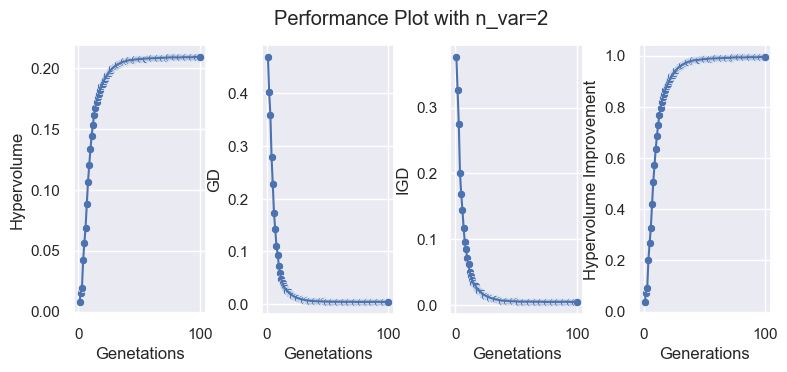

Max values of Hypervolume is 0.20905811614055292 
 , Best value of GD is 0.004147733978749302 
 , Best value of IGD is 
 0.004585091256558625 Best value of GD+ is 0.0027498859102762637 , Best value of IGD+ is 0.0025074506958898623


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams["figure.figsize"] = [9.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,4)
fig.suptitle('Performance Plot with n_var=2')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
axes[2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[3])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[3])
axes[3].set(xlabel='Generations',ylabel='Hypervolume Improvement')



plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))

[Text(0.5, 0, 'Genetations'), Text(0, 0.5, 'IGD Plus')]

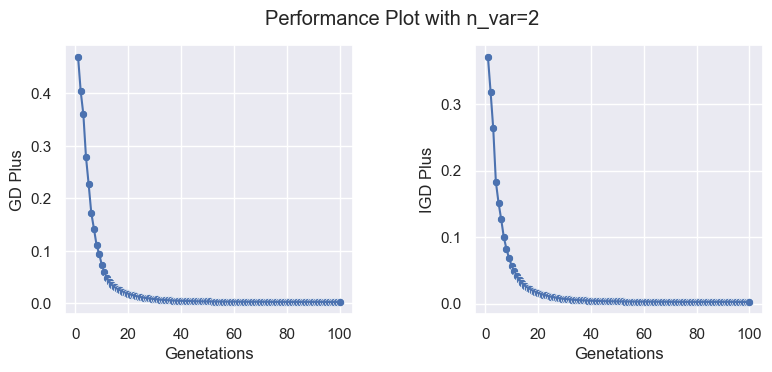

In [ ]:
plt.rcParams["figure.figsize"] = [9.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,2)
fig.suptitle('Performance Plot with n_var=2')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)
fig.suptitle('Performance Plot with n_var=2')
sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='IGD Plus')



Text(0, 0.5, 'Objective 2')

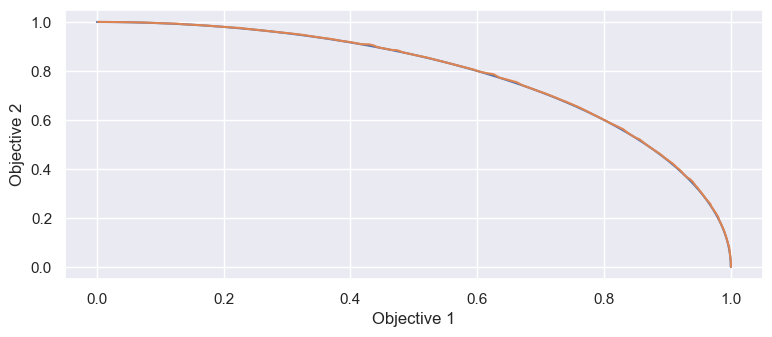

In [ ]:
problem = DTLZ2(n_obj=2)
original_pareto_front = problem.pareto_front()
original_objective_1 = [i[0] for i in original_pareto_front]
original_objective_2 = [i[1] for i in original_pareto_front]
optimized_result = model_list[0]
optimized_objectives  = optimized_result.F
optimized_objective_1 = [i[0] for i in optimized_objectives]
optimized_objective_2 = [i[1] for i in optimized_objectives]
sns.lineplot(x=original_objective_1,y=original_objective_2)
sns.lineplot(x=optimized_objective_1,y=optimized_objective_2)
plt.xlabel("Objective 1")
plt.ylabel("Objective 2")

#### SPEA2 nobj = 2 , nvar = 3

In [ ]:
model_list = []
problem = DTLZ2(n_obj=2,n_var=3)
algorithm = SPEA2(pop_size=100)
for i in range(5):
    model_list.append(minimize(problem,
                algorithm,
                ('n_gen', 100),
                save_history = True,
                verbose=True))

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      100 |     21 |  0.0405273291 |  0.0640940044 |  0.1580719390 |  0.0639189832 |  0.0306282787
     2 |      200 |     32 |  0.0334050666 |  0.0386686128 |  0.1689448991 |  0.0385277518 |  0.0249030347
     3 |      300 |     42 |  0.0285084590 |  0.0327852443 |  0.1781048395 |  0.0325656257 |  0.0195521518
     4 |      400 |     46 |  0.0231780371 |  0.0336555468 |  0.1863262662 |  0.0333403019 |  0.0138733058
     5 |      500 |     58 |  0.0187043006 |  0.0193478379 |  0.1952077148 |  0.0189175252 |  0.0095591658
     6 |      600 |     71 |  0.0157828050 |  0.0087465684 |  0.1991842712 |  0.0082686117 |  0.0072928642
     7 |      700 |     84 |  0.0134824581 |  0.0090479478 |  0.2026373992 |  0.0084711404 |  0.0057158403
     8 |      800 |    100 |  0.0085717327 |  0.0082344309 |  0.2052437384 |  0.0074816857 |  0.0045866747
     9 |      900 |    100 |  0.00728

In [ ]:
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar3 for i in data_avg_hyp_improvement ]

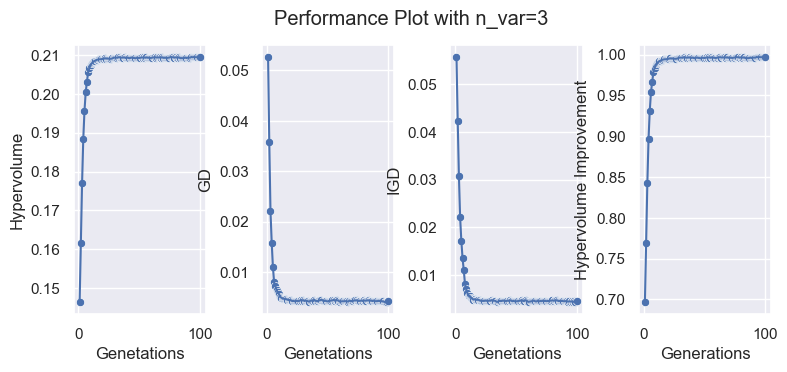

Max values of Hypervolume is 0.20950743264673083 
 , Best value of GD is 0.004070930213277398 
 , Best value of IGD is 
 0.004414562202635727 Best value of GD+ is 0.002484456124204431 , Best value of IGD+ is 0.0022233182340329538


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [9.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,4)
fig.suptitle('Performance Plot with n_var=3')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
axes[2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[3])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[3])
axes[3].set(xlabel='Generations',ylabel='Hypervolume Improvement')


plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))

[Text(0.5, 0, 'Genetations'), Text(0, 0.5, 'IGD Plus')]

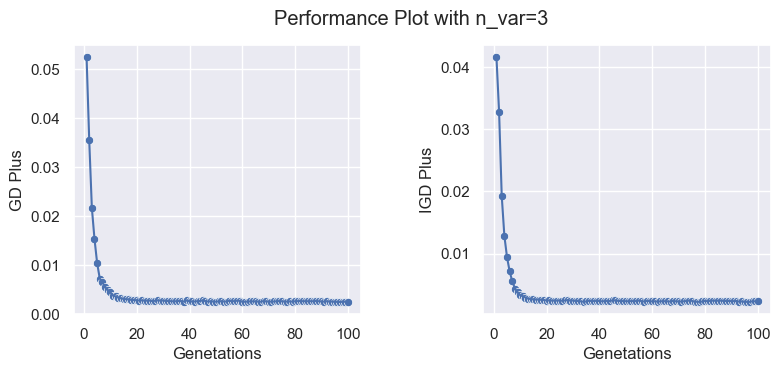

In [ ]:
plt.rcParams["figure.figsize"] = [9.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,2)
fig.suptitle('Performance Plot with n_var=3')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)


sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='IGD Plus')

Text(0, 0.5, 'Objective 2')

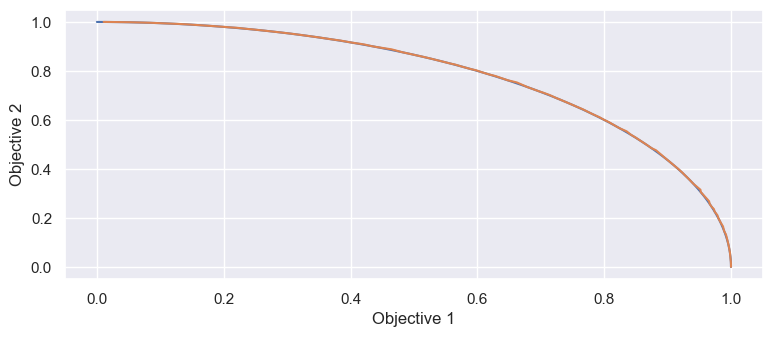

In [ ]:
problem = DTLZ2(n_obj=2)
original_pareto_front = problem.pareto_front()
original_objective_1 = [i[0] for i in original_pareto_front]
original_objective_2 = [i[1] for i in original_pareto_front]
optimized_result = model_list[0]
optimized_objectives  = optimized_result.F
optimized_objective_1 = [i[0] for i in optimized_objectives]
optimized_objective_2 = [i[1] for i in optimized_objectives]
sns.lineplot(x=original_objective_1,y=original_objective_2)
sns.lineplot(x=optimized_objective_1,y=optimized_objective_2)
plt.xlabel("Objective 1")
plt.ylabel("Objective 2")

#### SPEA2 nobj = 2 , nvar = 5

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      100 |     16 |  0.1376428420 |  0.1731113498 |  0.0905149015 |  0.1731113498 |  0.1357842690
     2 |      200 |     18 |  0.0932597739 |  0.1165379321 |  0.1024070815 |  0.1165379321 |  0.0896657439
     3 |      300 |     21 |  0.0711375148 |  0.1005500698 |  0.1317240735 |  0.1005477622 |  0.0648993370
     4 |      400 |     18 |  0.0558434484 |  0.0447971353 |  0.1399514888 |  0.0447882713 |  0.0440527296
     5 |      500 |     27 |  0.0366483726 |  0.0258628739 |  0.1596358024 |  0.0258207047 |  0.0292623926
     6 |      600 |     43 |  0.0308770363 |  0.0223841201 |  0.1743679163 |  0.0223427103 |  0.0228116997
     7 |      700 |     50 |  0.0248507947 |  0.0165544695 |  0.1841094519 |  0.0165156009 |  0.0173869571
     8 |      800 |     59 |  0.0207008054 |  0.0137867794 |  0.1894278654 |  0.0137257718 |  0.0139702698
     9 |      900 |     69 |  0.01721

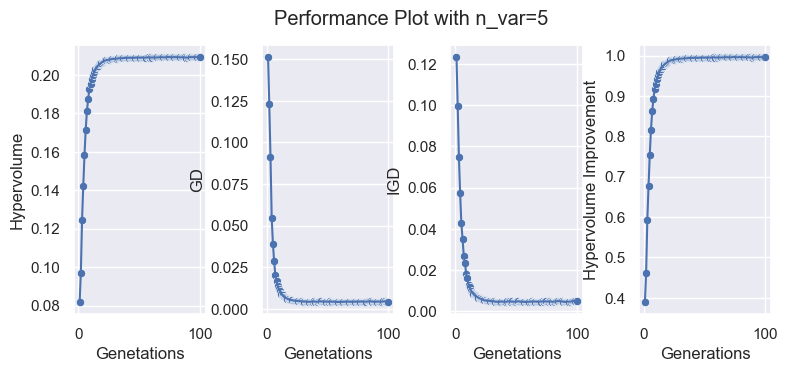

Max values of Hypervolume is 0.20939749415530237 
 , Best value of GD is 0.0041477965792851065 
 , Best value of IGD is 
 0.0045312631673790635 Best value of GD+ is 0.002577935832178365 , Best value of IGD+ is 0.002301915816053237


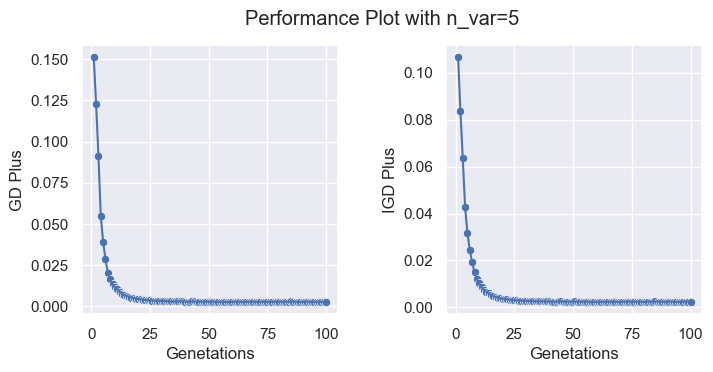

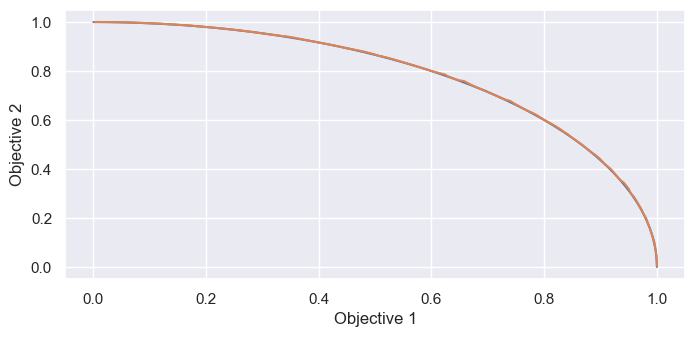

In [ ]:
model_list = []
problem = DTLZ2(n_obj=2,n_var = 5)
algorithm = SPEA2(pop_size=100)
for i in range(5):
    model_list.append(minimize(problem,
                algorithm,
                ('n_gen', 100),
                save_history = True,
                verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar5 for i in data_avg_hyp_improvement ]

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [9.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,4)
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
fig.suptitle('Performance Plot with n_var=5')
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
axes[2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[3])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[3])
axes[3].set(xlabel='Generations',ylabel='Hypervolume Improvement')

plt.show()

print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))

plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,2)

sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)
fig.suptitle('Performance Plot with n_var=5')
sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='IGD Plus')
plt.show()

problem = DTLZ2(n_obj=2)
original_pareto_front = problem.pareto_front()
original_objective_1 = [i[0] for i in original_pareto_front]
original_objective_2 = [i[1] for i in original_pareto_front]
optimized_result = model_list[0]
optimized_objectives  = optimized_result.F
optimized_objective_1 = [i[0] for i in optimized_objectives]
optimized_objective_2 = [i[1] for i in optimized_objectives]
sns.lineplot(x=original_objective_1,y=original_objective_2)
sns.lineplot(x=optimized_objective_1,y=optimized_objective_2)
plt.xlabel("Objective 1")
plt.ylabel("Objective 2")
plt.show()

#### SPEA2 nobj = 2 , nvar = 10

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |     1000 |     22 |  0.2347692494 |  0.3601631251 |  0.0098367837 |  0.3601628905 |  0.2310887985
     2 |     2000 |     32 |  0.1974481118 |  0.3359029683 |  0.0319616940 |  0.3359027128 |  0.1956622758
     3 |     3000 |     26 |  0.1531865230 |  0.2535571864 |  0.0567159125 |  0.2535565957 |  0.1513746399
     4 |     4000 |     29 |  0.1103124276 |  0.2102347132 |  0.0813758439 |  0.2102346845 |  0.1063549488
     5 |     5000 |     38 |  0.0955698076 |  0.1589233858 |  0.0993721776 |  0.1589221662 |  0.0860792087
     6 |     6000 |     37 |  0.0744859984 |  0.1171794809 |  0.1199018711 |  0.1171789831 |  0.0682667435
     7 |     7000 |     51 |  0.0557135205 |  0.1038376321 |  0.1401822892 |  0.1038338958 |  0.0500858760
     8 |     8000 |     50 |  0.0447081250 |  0.0737963070 |  0.1529654344 |  0.0737944226 |  0.0422669666
     9 |     9000 |     56 |  0.03714

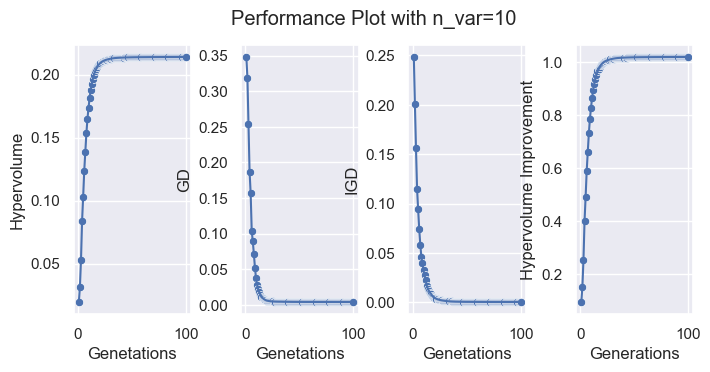

Max values of Hypervolume is 0.21406416473258433 
 , Best value of GD is 0.0041338412599871335 
 , Best value of IGD is 
 0.000439777737285973 Best value of GD+ is 0.0022342972690928145 , Best value of IGD+ is 0.00024010912761890808


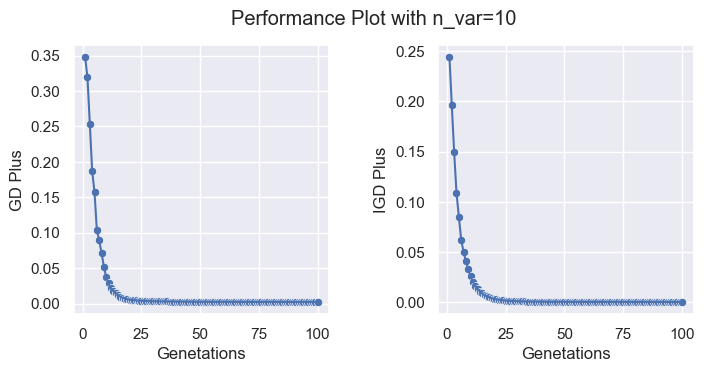

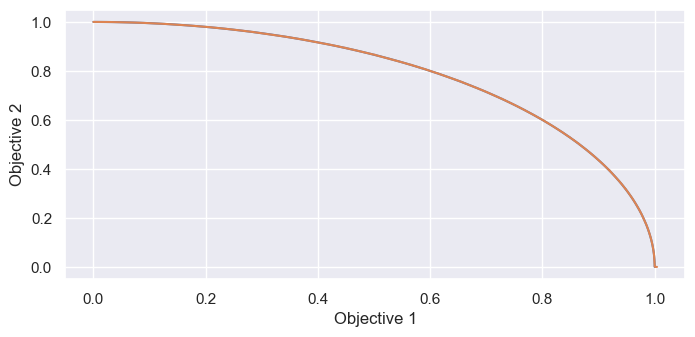

In [ ]:
model_list = []
problem = DTLZ2(n_obj=2,n_var =10)
algorithm = SPEA2(pop_size=100)
for i in range(5):
    model_list.append(minimize(problem,
                algorithm,
                ('n_gen', 100),
                save_history = True,
                verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar10 for i in data_avg_hyp_improvement ]

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,4)
fig.suptitle('Performance Plot with n_var=10')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
axes[2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[3])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[3])
axes[3].set(xlabel='Generations',ylabel='Hypervolume Improvement')



plt.show()

print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,2)
fig.suptitle('Performance Plot with n_var=10')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)


sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='IGD Plus')
plt.show()

problem = DTLZ2(n_obj=2)
original_pareto_front = problem.pareto_front()
original_objective_1 = [i[0] for i in original_pareto_front]
original_objective_2 = [i[1] for i in original_pareto_front]
optimized_result = model_list[0]
optimized_objectives  = optimized_result.F
optimized_objective_1 = [i[0] for i in optimized_objectives]
optimized_objective_2 = [i[1] for i in optimized_objectives]
sns.lineplot(x=original_objective_1,y=original_objective_2)
sns.lineplot(x=optimized_objective_1,y=optimized_objective_2)
plt.xlabel("Objective 1")
plt.ylabel("Objective 2")
plt.show()

#### NSGA2 nobj = 2 nvar = 2

In [ ]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.problems.many import DTLZ2
from pymoo.optimize import minimize
model_list_nsga2 = []
problem = DTLZ2(n_obj=2,n_var=2)
algorithm = NSGA2(pop_size=100)
for i in range(5):
    model_list_nsga2.append(minimize(problem,
               algorithm,
               ('n_gen', 100),
               seed=1,
               save_history = True,
               verbose=True))

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |     1000 |    133 |  0.0060184227 |  0.0064409052 |  0.2073761004 |  0.0053561354 |  0.0033400128
     2 |     2000 |    175 |  0.0046270223 |  0.0070576307 |  0.2090009399 |  0.0058445973 |  0.0026254936
     3 |     3000 |    227 |  0.0032718702 |  0.0057320894 |  0.2105214372 |  0.0043506017 |  0.0019152663
     4 |     4000 |    341 |  0.0023404051 |  0.0046620859 |  0.2118758770 |  0.0030882177 |  0.0012829813
     5 |     5000 |    476 |  0.0016446383 |  0.0045383865 |  0.2126882153 |  0.0028495426 |  0.0008666148
     6 |     6000 |    675 |  0.0010175294 |  0.0043787658 |  0.2133273513 |  0.0026690191 |  0.0005371573
     7 |     7000 |    904 |  0.0008039582 |  0.0042313465 |  0.2136612459 |  0.0024811356 |  0.0004186612
     8 |     8000 |   1000 |  0.0005988715 |  0.0042679815 |  0.2138686514 |  0.0024756444 |  0.0003057673
     9 |     9000 |   1000 |  0.00052

KeyboardInterrupt: 

In [ ]:
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list_nsga2:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar2 for i in data_avg_hyp_improvement ]





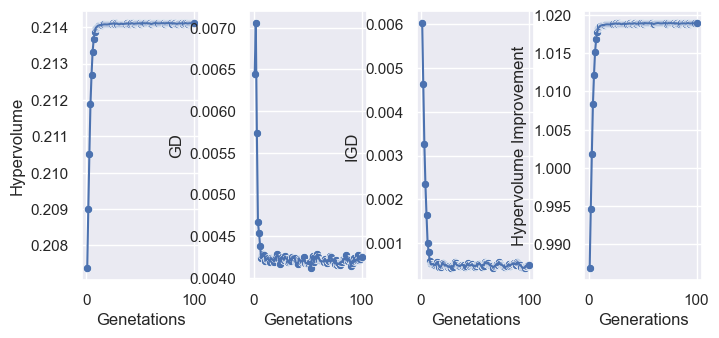

Max values of Hypervolume is 0.2141141774266742 
 , Best value of GD is 0.007057630665425451 
 , Best value of IGD is 
 0.006018422664641398 Best value of GD+ is 0.005844597274067771 , Best value of IGD+ is 0.0033400128334806385


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,4)
fig.suptitle('Performance Plot with n_var=2')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
axes[2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[3])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[3])
axes[3].set(xlabel='Generations',ylabel='Hypervolume Improvement')



plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))

[Text(0.5, 0, 'Genetations'), Text(0, 0.5, 'IGD Plus')]

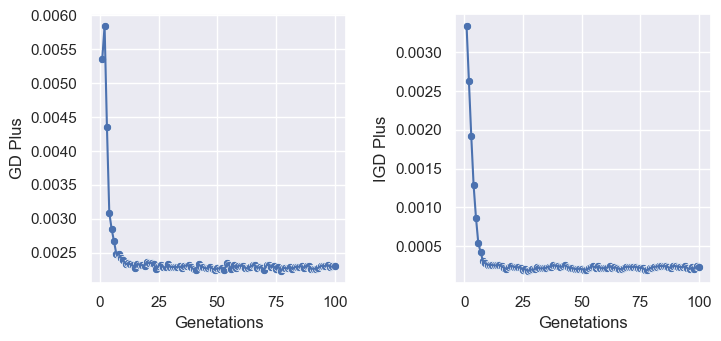

In [ ]:
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,2)
fig.suptitle('Performance Plot with n_var=2')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)


sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='IGD Plus')



Text(0, 0.5, 'Objective 2')

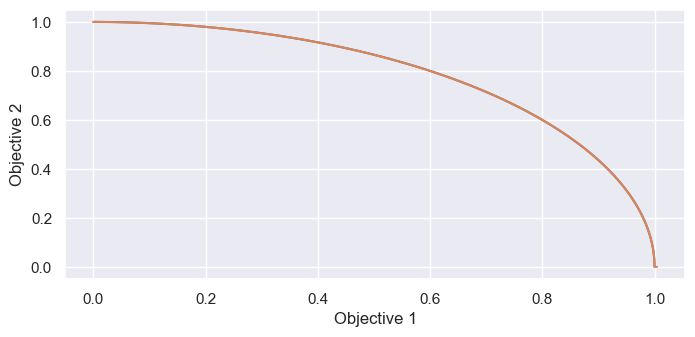

In [ ]:
problem = DTLZ2(n_obj=2)
original_pareto_front = problem.pareto_front()
original_objective_1 = [i[0] for i in original_pareto_front]
original_objective_2 = [i[1] for i in original_pareto_front]
optimized_result = model_list_nsga2[0]
optimized_objectives  = optimized_result.F
optimized_objective_1 = [i[0] for i in optimized_objectives]
optimized_objective_2 = [i[1] for i in optimized_objectives]
sns.lineplot(x=original_objective_1,y=original_objective_2)
sns.lineplot(x=optimized_objective_1,y=optimized_objective_2)
plt.xlabel("Objective 1")
plt.ylabel("Objective 2")

#### NSGA2 nobj = 2 nvar = 3

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |     1000 |     48 |  0.0202583084 |  0.0202444900 |  0.1894984088 |  0.0200361258 |  0.0140578138
     2 |     2000 |     64 |  0.0161910718 |  0.0226942935 |  0.1948890015 |  0.0222848909 |  0.0094731796
     3 |     3000 |    100 |  0.0092860931 |  0.0156951069 |  0.2021480352 |  0.0150359682 |  0.0059563936
     4 |     4000 |    131 |  0.0068727574 |  0.0074730253 |  0.2052331451 |  0.0067991393 |  0.0044858593
     5 |     5000 |    175 |  0.0055653537 |  0.0072454638 |  0.2079054423 |  0.0063327431 |  0.0032664366
     6 |     6000 |    229 |  0.0041463930 |  0.0060723787 |  0.2096901191 |  0.0049679226 |  0.0023031775
     7 |     7000 |    307 |  0.0032459997 |  0.0050735734 |  0.2110098488 |  0.0037951294 |  0.0016736605
     8 |     8000 |    403 |  0.0022174676 |  0.0047929427 |  0.2120208130 |  0.0033963477 |  0.0011825991
     9 |     9000 |    527 |  0.00164

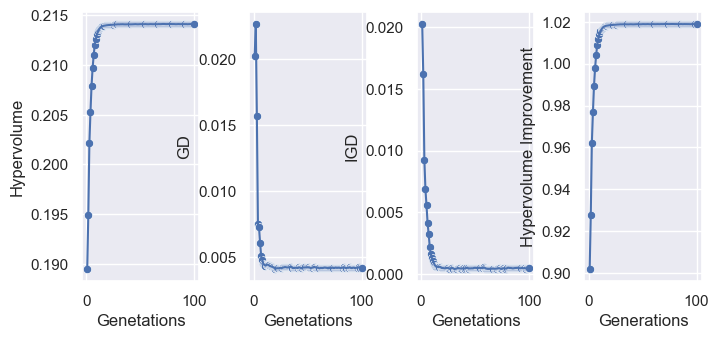

Max values of Hypervolume is 0.21411922568141528 
 , Best value of GD is 0.022694293548220702 
 , Best value of IGD is 
 0.020258308431612332 Best value of GD+ is 0.022284890910924247 , Best value of IGD+ is 0.014057813804010588


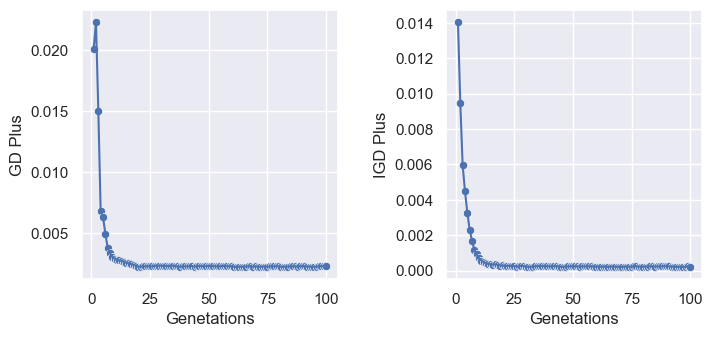

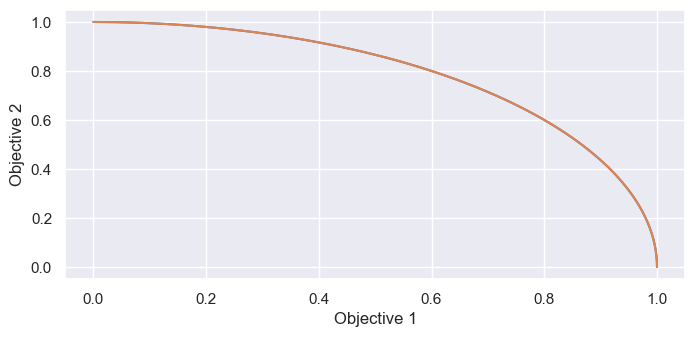

In [ ]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.problems.many import DTLZ2
from pymoo.optimize import minimize
model_list_nsga2 = []
problem = DTLZ2(n_obj=2,n_var=3)
algorithm = NSGA2(pop_size=100)
for i in range(5):
    model_list_nsga2.append(minimize(problem,
               algorithm,
               ('n_gen', 100),
               seed=1,
               save_history = True,
               verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list_nsga2:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar3 for i in data_avg_hyp_improvement ]





import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,4)
fig.suptitle('Performance Plot with n_var=3')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.725)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
axes[2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[3])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[3])
axes[3].set(xlabel='Generations',ylabel='Hypervolume Improvement')



plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,2)

sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)
fig.suptitle('Performance Plot with n_var=3')
sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='IGD Plus')
plt.show()


problem = DTLZ2(n_obj=2)
original_pareto_front = problem.pareto_front()
original_objective_1 = [i[0] for i in original_pareto_front]
original_objective_2 = [i[1] for i in original_pareto_front]
optimized_result = model_list_nsga2[0]
optimized_objectives  = optimized_result.F
optimized_objective_1 = [i[0] for i in optimized_objectives]
optimized_objective_2 = [i[1] for i in optimized_objectives]
sns.lineplot(x=original_objective_1,y=original_objective_2)
sns.lineplot(x=optimized_objective_1,y=optimized_objective_2)
plt.xlabel("Objective 1")
plt.ylabel("Objective 2")
plt.show()

#### NSGA2 nobj  =2 nvar = 5

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |     1000 |     33 |  0.0581035670 |  0.0970516535 |  0.1366594892 |  0.0970477273 |  0.0535084040
     2 |     2000 |     34 |  0.0479633875 |  0.0936559374 |  0.1593938840 |  0.0936438828 |  0.0386838170
     3 |     3000 |     44 |  0.0363274035 |  0.0582060465 |  0.1693500024 |  0.0581451885 |  0.0276776804
     4 |     4000 |     53 |  0.0299133393 |  0.0360624133 |  0.1773493971 |  0.0359913360 |  0.0211583404
     5 |     5000 |     65 |  0.0194166806 |  0.0252540474 |  0.1867720674 |  0.0251401206 |  0.0150774042
     6 |     6000 |     76 |  0.0144536970 |  0.0167263952 |  0.1936600850 |  0.0166089268 |  0.0114305744
     7 |     7000 |    113 |  0.0124494019 |  0.0142453953 |  0.1977317291 |  0.0140139570 |  0.0093055450
     8 |     8000 |    145 |  0.0096753733 |  0.0113345811 |  0.2010285746 |  0.0110677186 |  0.0074162067
     9 |     9000 |    169 |  0.00799

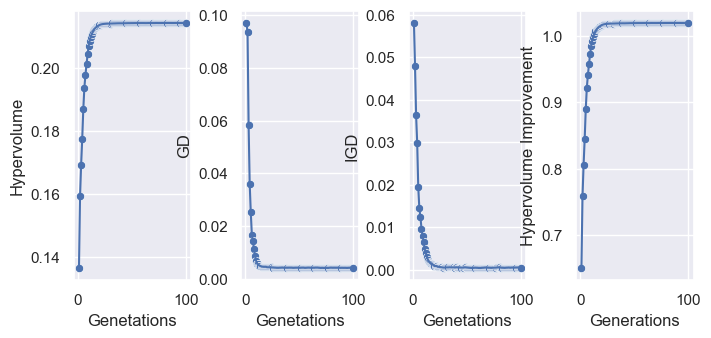

Max values of Hypervolume is 0.21411991072317874 
 , Best value of GD is 0.09705165346813262 
 , Best value of IGD is 
 0.058103566972684095 Best value of GD+ is 0.09704772732008912 , Best value of IGD+ is 0.05350840396121966


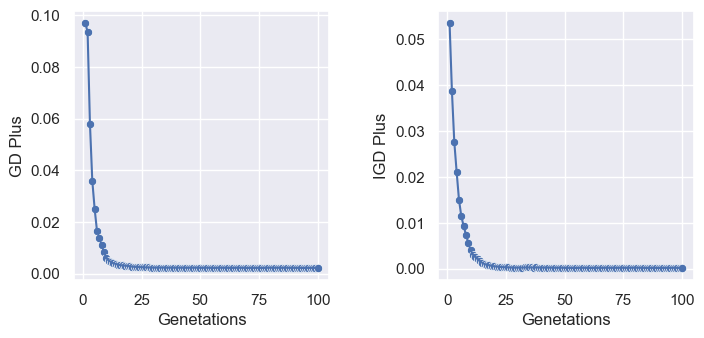

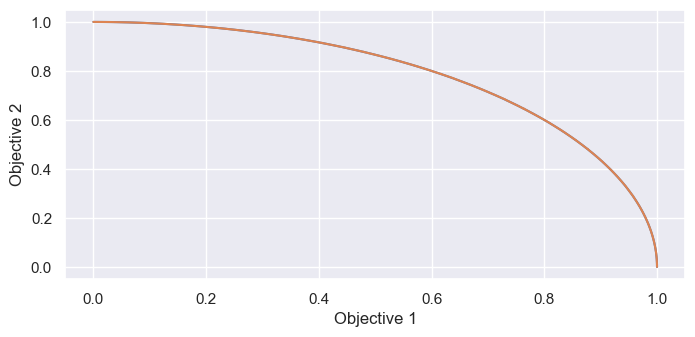

In [ ]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.problems.many import DTLZ2
from pymoo.optimize import minimize
model_list_nsga2 = []
problem = DTLZ2(n_obj=2,n_var=5)
algorithm = NSGA2(pop_size=100)
for i in range(5):
    model_list_nsga2.append(minimize(problem,
               algorithm,
               ('n_gen', 100),
               seed=1,
               save_history = True,
               verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list_nsga2:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar5 for i in data_avg_hyp_improvement ]





import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,4)
fig.suptitle('Performance Plot with n_var=5')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
axes[2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[3])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[3])
axes[3].set(xlabel='Generations',ylabel='Hypervolume Improvement')


plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,2)
fig.suptitle('Performance Plot with n_var=5')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)


sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='IGD Plus')
plt.show()


problem = DTLZ2(n_obj=2)
original_pareto_front = problem.pareto_front()
original_objective_1 = [i[0] for i in original_pareto_front]
original_objective_2 = [i[1] for i in original_pareto_front]
optimized_result = model_list_nsga2[0]
optimized_objectives  = optimized_result.F
optimized_objective_1 = [i[0] for i in optimized_objectives]
optimized_objective_2 = [i[1] for i in optimized_objectives]
sns.lineplot(x=original_objective_1,y=original_objective_2)
sns.lineplot(x=optimized_objective_1,y=optimized_objective_2)
plt.xlabel("Objective 1")
plt.ylabel("Objective 2")
plt.show()

#### NSGA2 nobj = 2 nvar = 10

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |     1000 |     19 |  0.2058326926 |  0.3799262191 |  0.0215021093 |  0.3799260989 |  0.1961436922
     2 |     2000 |     22 |  0.1818287676 |  0.3705227870 |  0.0406339830 |  0.3705226024 |  0.1734281748
     3 |     3000 |     29 |  0.1615517578 |  0.3289993923 |  0.0585406449 |  0.3289992523 |  0.1526245483
     4 |     4000 |     19 |  0.1234276604 |  0.1620177014 |  0.0801267028 |  0.1620177014 |  0.1151908857
     5 |     5000 |     23 |  0.0886983894 |  0.1399916381 |  0.1110183223 |  0.1399916381 |  0.0864568979
     6 |     6000 |     30 |  0.0745064432 |  0.1002662886 |  0.1276173795 |  0.1002662886 |  0.0712859034
     7 |     7000 |     36 |  0.0726492131 |  0.0763002967 |  0.1378018136 |  0.0762970800 |  0.0546975651
     8 |     8000 |     48 |  0.0544186219 |  0.0553897767 |  0.1534155318 |  0.0553859644 |  0.0432043577
     9 |     9000 |     60 |  0.03742

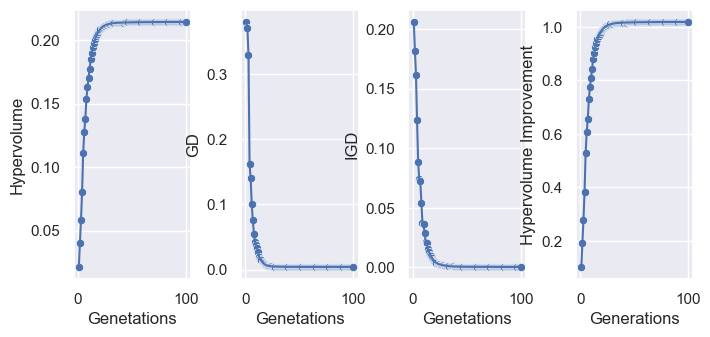

Max values of Hypervolume is 0.21408618093306475 
 , Best value of GD is 0.37992621913823943 
 , Best value of IGD is 
 0.205832692566227 Best value of GD+ is 0.37992609886679385 , Best value of IGD+ is 0.19614369217271269


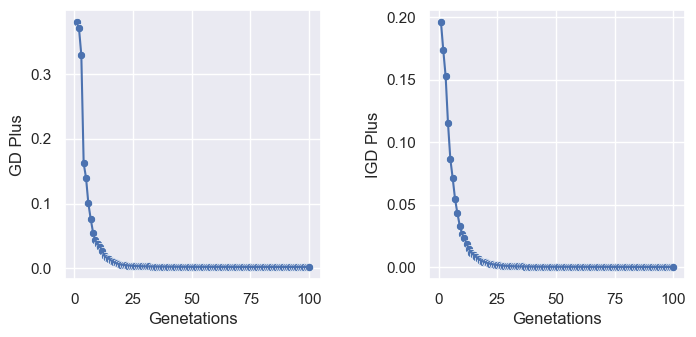

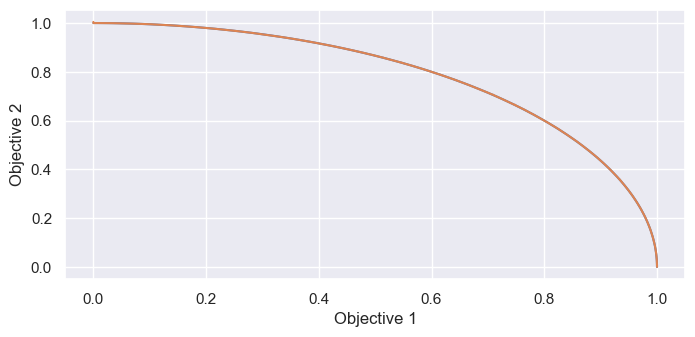

In [ ]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.problems.many import DTLZ2
from pymoo.optimize import minimize
model_list_nsga2 = []
problem = DTLZ2(n_obj=2,n_var=10)
algorithm = NSGA2(pop_size=100)
for i in range(5):
    model_list_nsga2.append(minimize(problem,
               algorithm,
               ('n_gen', 100),
               seed=1,
               save_history = True,
               verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list_nsga2:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar10 for i in data_avg_hyp_improvement ]




import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,4)
fig.suptitle('Performance Plot with n_var=10')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
axes[2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[3])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[3])
axes[3].set(xlabel='Generations',ylabel='Hypervolume Improvement')



plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,2)
fig.suptitle('Performance Plot with n_var=10')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)


sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='IGD Plus')
plt.show()


problem = DTLZ2(n_obj=2)
original_pareto_front = problem.pareto_front()
original_objective_1 = [i[0] for i in original_pareto_front]
original_objective_2 = [i[1] for i in original_pareto_front]
optimized_result = model_list_nsga2[0]
optimized_objectives  = optimized_result.F
optimized_objective_1 = [i[0] for i in optimized_objectives]
optimized_objective_2 = [i[1] for i in optimized_objectives]
sns.lineplot(x=original_objective_1,y=original_objective_2)
sns.lineplot(x=optimized_objective_1,y=optimized_objective_2)
plt.xlabel("Objective 1")
plt.ylabel("Objective 2")
plt.show()

#### MOEAD nobj = 2 , nvar = 2

In [ ]:
from pymoo.algorithms.moo.moead import MOEAD
from pymoo.problems.many import DTLZ2
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.optimize import minimize
model_list_moead = []
problem = DTLZ2(n_obj=2,n_var=2)
ref_dirs = get_reference_directions('energy',2,100,seed=1)
algorithm = MOEAD(ref_dirs=ref_dirs , n_neighbours=15)
for i in range(5):
    model_list_moead.append(minimize(problem,
               algorithm,
               ('n_gen', 100),
               seed=2,
               save_history = True,
               verbose=True))

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |       90 |     29 |  0.0236426110 |  0.0163018373 |  0.1893300790 |  0.0155008746 |  0.0137931516
     2 |      180 |     79 |  0.0434946406 |  0.0086566982 |  0.1684140571 |  0.0081885070 |  0.0293737860
     3 |      270 |     90 |  0.0212790332 |  0.0041553030 |  0.1946269364 |  0.0028116114 |  0.0119144677
     4 |      360 |     89 |  0.0131055849 |  0.0049848506 |  0.2015939662 |  0.0036309276 |  0.0075509345
     5 |      450 |     90 |  0.0093105981 |  0.0051490574 |  0.2058274320 |  0.0034746721 |  0.0056954259
     6 |      540 |     90 |  0.0081043406 |  0.0047985699 |  0.2069766633 |  0.0033478762 |  0.0050666420
     7 |      630 |     90 |  0.0066562929 |  0.0040173530 |  0.2074713714 |  0.0024402863 |  0.0035887331
     8 |      720 |     89 |  0.0061540821 |  0.0039464809 |  0.2076233686 |  0.0023485472 |  0.0032144752
     9 |      810 |     89 |  0.00579

In [ ]:
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list_moead:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar2 for i in data_avg_hyp_improvement ]






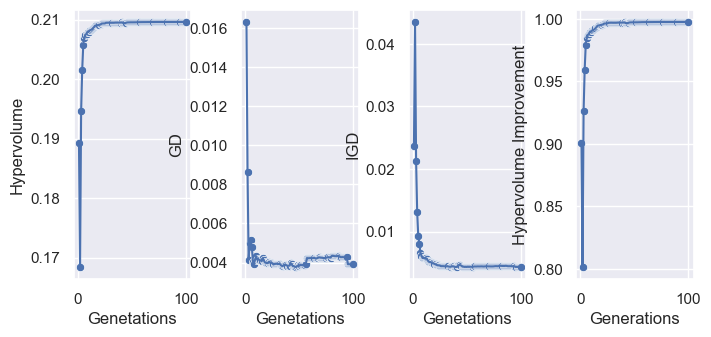

Max values of Hypervolume is 0.20961110748005982 
 , Best value of GD is 0.016301837323780547 
 , Best value of IGD is 
 0.043494640567439555 Best value of GD+ is 0.015500874610054316 , Best value of IGD+ is 0.029373785962397064


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,4)
fig.suptitle('Performance Plot with n_var=2')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
axes[2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[3])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[3])
axes[3].set(xlabel='Generations',ylabel='Hypervolume Improvement')



plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))

[Text(0.5, 0, 'Genetations'), Text(0, 0.5, 'IGD Plus')]

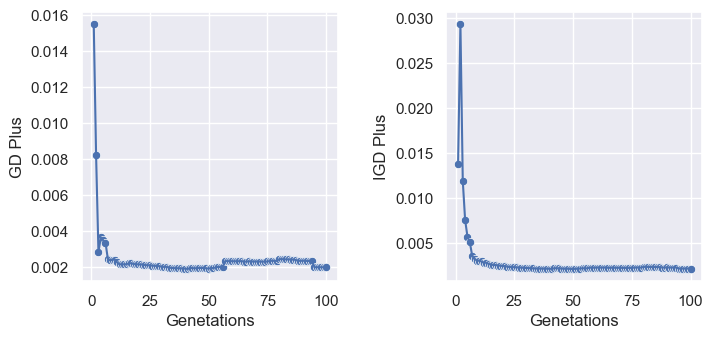

In [ ]:
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,2)

sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)
fig.suptitle('Performance Plot with n_var=2')
sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='IGD Plus')



Text(0, 0.5, 'Objective 2')

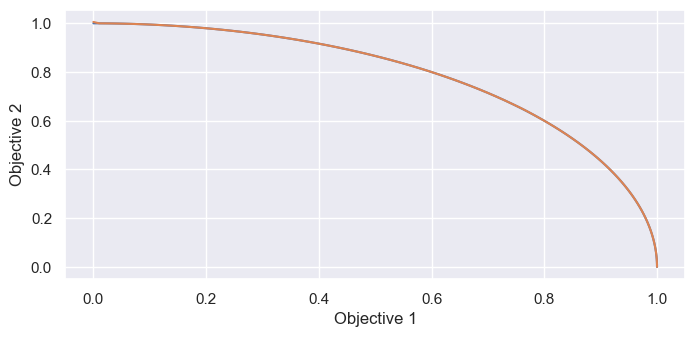

In [ ]:
problem = DTLZ2(n_obj=2)
original_pareto_front = problem.pareto_front()
original_objective_1 = [i[0] for i in original_pareto_front]
original_objective_2 = [i[1] for i in original_pareto_front]
optimized_result = model_list_moead[0]
optimized_objectives  = optimized_result.F
optimized_objective_1 = [i[0] for i in optimized_objectives]
optimized_objective_2 = [i[1] for i in optimized_objectives]
sns.lineplot(x=original_objective_1,y=original_objective_2)
sns.lineplot(x=optimized_objective_1,y=optimized_objective_2)
plt.xlabel("Objective 1")
plt.ylabel("Objective 2")

#### MOEAD nobj =2 nvars  = 3

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |       90 |     17 |  0.0536860183 |  0.0417609112 |  0.1441768850 |  0.0416842027 |  0.0411706017
     2 |      180 |     59 |  0.0560330748 |  0.0197210592 |  0.1435142776 |  0.0197054833 |  0.0422122302
     3 |      270 |     86 |  0.0290582955 |  0.0110882014 |  0.1820349289 |  0.0104680855 |  0.0205806416
     4 |      360 |     84 |  0.0231752701 |  0.0099239080 |  0.1912057185 |  0.0086886950 |  0.0117399480
     5 |      450 |     87 |  0.0213474631 |  0.0059144807 |  0.1940116698 |  0.0041252046 |  0.0101002076
     6 |      540 |     84 |  0.0142799487 |  0.0060499420 |  0.1994594365 |  0.0042696180 |  0.0075221856
     7 |      630 |     87 |  0.0126406044 |  0.0056020662 |  0.2016161740 |  0.0039708756 |  0.0066099821
     8 |      720 |     90 |  0.0093843556 |  0.0044585859 |  0.2041878651 |  0.0028156106 |  0.0048631001
     9 |      810 |     90 |  0.00737

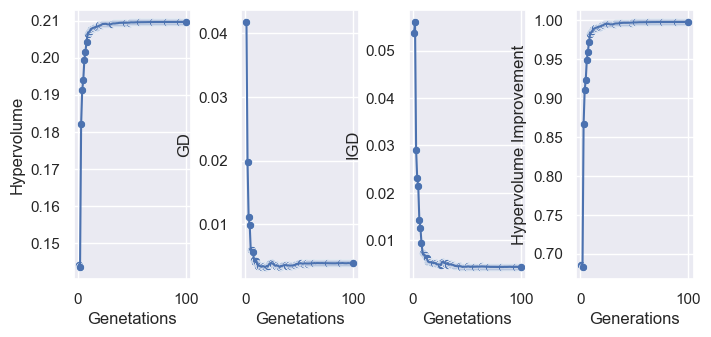

Max values of Hypervolume is 0.2096074291567108 
 , Best value of GD is 0.04176091117420873 
 , Best value of IGD is 
 0.05603307482764499 Best value of GD+ is 0.041684202657216105 , Best value of IGD+ is 0.04221223019365037


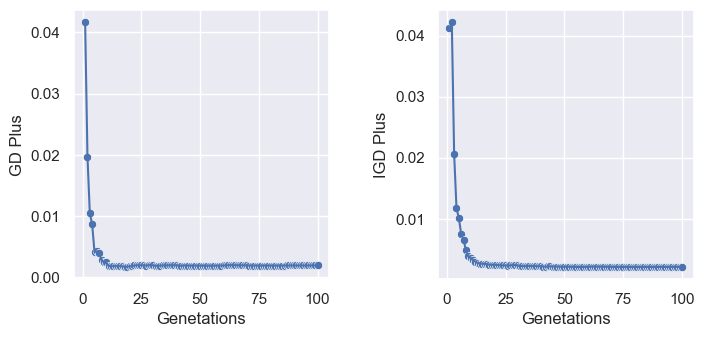

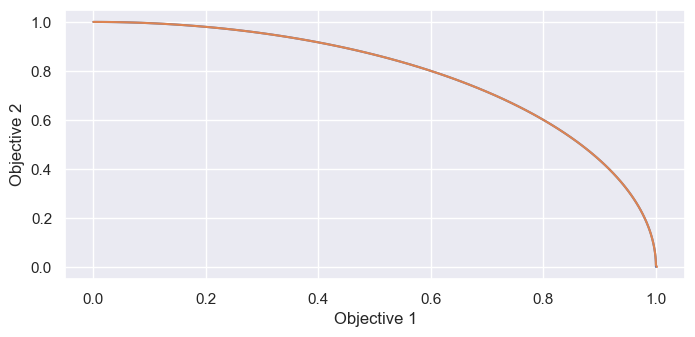

In [ ]:
from pymoo.algorithms.moo.moead import MOEAD
from pymoo.problems.many import DTLZ2
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.optimize import minimize
model_list_moead = []
problem = DTLZ2(n_obj=2,n_var=3)
ref_dirs = get_reference_directions('energy',2,100,seed=1)
algorithm = MOEAD(ref_dirs=ref_dirs , n_neighbours=15)
for i in range(5):
    model_list_moead.append(minimize(problem,
               algorithm,
               ('n_gen', 100),
               seed=2,
               save_history = True,
               verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list_moead:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar3 for i in data_avg_hyp_improvement ]


import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,4)
sns.set_theme(style="darkgrid")
fig.suptitle('Performance Plot with n_var=3')
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
axes[2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[3])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[3])
axes[3].set(xlabel='Generations',ylabel='Hypervolume Improvement')

plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,2)

sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)
fig.suptitle('Performance Plot with n_var=3')
sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='IGD Plus')
plt.show()


problem = DTLZ2(n_obj=2)
original_pareto_front = problem.pareto_front()
original_objective_1 = [i[0] for i in original_pareto_front]
original_objective_2 = [i[1] for i in original_pareto_front]
optimized_result = model_list_moead[0]
optimized_objectives  = optimized_result.F
optimized_objective_1 = [i[0] for i in optimized_objectives]
optimized_objective_2 = [i[1] for i in optimized_objectives]
sns.lineplot(x=original_objective_1,y=original_objective_2)
sns.lineplot(x=optimized_objective_1,y=optimized_objective_2)
plt.xlabel("Objective 1")
plt.ylabel("Objective 2")
plt.show()

#### MOEAD nobj = 2 nvars = 5

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |       90 |     13 |  0.1318718567 |  0.1403061235 |  0.0669255229 |  0.1403061235 |  0.1170517675
     2 |      180 |     45 |  0.1591949867 |  0.0970749707 |  0.0067135572 |  0.0970749707 |  0.1393263016
     3 |      270 |     86 |  0.0866414820 |  0.0258076720 |  0.1180256672 |  0.0257863141 |  0.0668259966
     4 |      360 |     89 |  0.0411733000 |  0.0123223915 |  0.1579060429 |  0.0121576144 |  0.0293457459
     5 |      450 |     90 |  0.0292035090 |  0.0092117459 |  0.1780292491 |  0.0088012724 |  0.0208442761
     6 |      540 |     89 |  0.0242203753 |  0.0072556228 |  0.1895089541 |  0.0066258329 |  0.0159303196
     7 |      630 |     87 |  0.0185320588 |  0.0066571773 |  0.1978664191 |  0.0055783203 |  0.0123708290
     8 |      720 |     87 |  0.0159581613 |  0.0067897848 |  0.2000466709 |  0.0059306250 |  0.0115271418
     9 |      810 |     76 |  0.03865

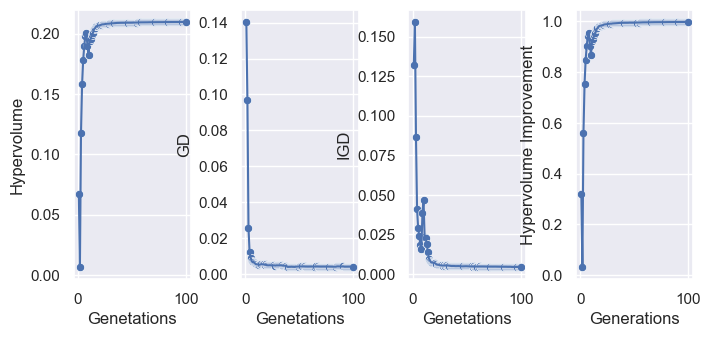

Max values of Hypervolume is 0.20955352257914456 
 , Best value of GD is 0.14030612349087843 
 , Best value of IGD is 
 0.15919498670266466 Best value of GD+ is 0.14030612349087843 , Best value of IGD+ is 0.13932630155614184


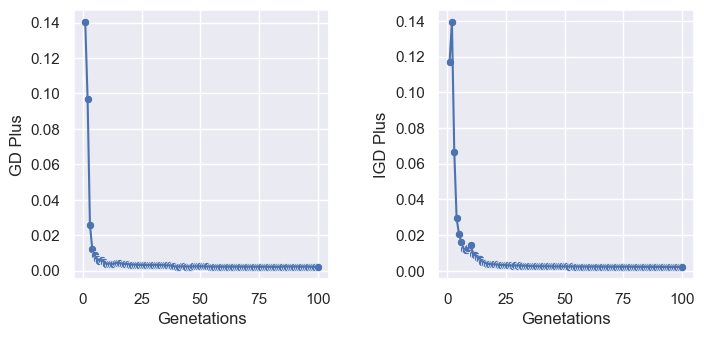

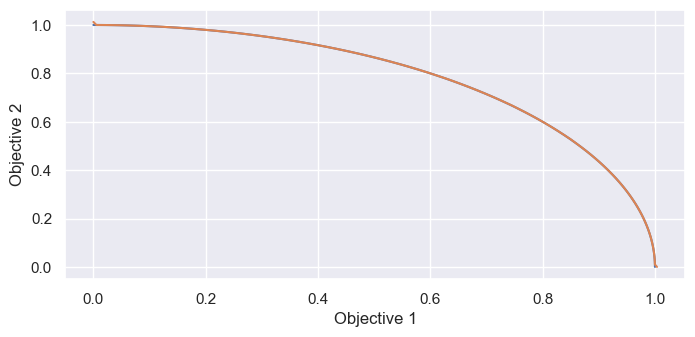

In [ ]:
from pymoo.algorithms.moo.moead import MOEAD
from pymoo.problems.many import DTLZ2
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.optimize import minimize
model_list_moead = []
problem = DTLZ2(n_obj=2,n_var=5)
ref_dirs = get_reference_directions('energy',2,100,seed=1)
algorithm = MOEAD(ref_dirs=ref_dirs , n_neighbours=15)
for i in range(5):
    model_list_moead.append(minimize(problem,
               algorithm,
               ('n_gen', 100),
               seed=2,
               save_history = True,
               verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list_moead:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar5 for i in data_avg_hyp_improvement ]




import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,4)
sns.set_theme(style="darkgrid")
fig.suptitle('Performance Plot with n_var=5')
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
axes[2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[3])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[3])
axes[3].set(xlabel='Generations',ylabel='Hypervolume Improvement')



plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,2)

sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)
fig.suptitle('Performance Plot with n_var=5')
sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='IGD Plus')
plt.show()

problem = DTLZ2(n_obj=2)
original_pareto_front = problem.pareto_front()
original_objective_1 = [i[0] for i in original_pareto_front]
original_objective_2 = [i[1] for i in original_pareto_front]
optimized_result = model_list_moead[0]
optimized_objectives  = optimized_result.F
optimized_objective_1 = [i[0] for i in optimized_objectives]
optimized_objective_2 = [i[1] for i in optimized_objectives]
sns.lineplot(x=original_objective_1,y=original_objective_2)
sns.lineplot(x=optimized_objective_1,y=optimized_objective_2)
plt.xlabel("Objective 1")
plt.ylabel("Objective 2")
plt.show()

#### MOEAD nobjs = 2, nvars = 10

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |       90 |     12 |  0.3217136408 |  0.4410974669 |  0.0119808275 |  0.4410974669 |  0.3192903011
     2 |      180 |     73 |  0.2563709111 |  0.2550787484 |  0.0183332685 |  0.2550787484 |  0.2457642571
     3 |      270 |     51 |  0.1992612016 |  0.2148022414 |  0.0261473482 |  0.2148022414 |  0.1788647321
     4 |      360 |     71 |  0.1727551147 |  0.1133500111 |  0.0631058062 |  0.1133327035 |  0.1128899812
     5 |      450 |     82 |  0.1145291619 |  0.0483443908 |  0.0798944528 |  0.0483117742 |  0.0757147043
     6 |      540 |     85 |  0.0744170144 |  0.0313395479 |  0.1248542400 |  0.0306257930 |  0.0481921909
     7 |      630 |     88 |  0.0655139961 |  0.0200867948 |  0.1372847971 |  0.0194793198 |  0.0385318185
     8 |      720 |     89 |  0.0535134435 |  0.0128782312 |  0.1536015835 |  0.0120941669 |  0.0308958563
     9 |      810 |     89 |  0.04929

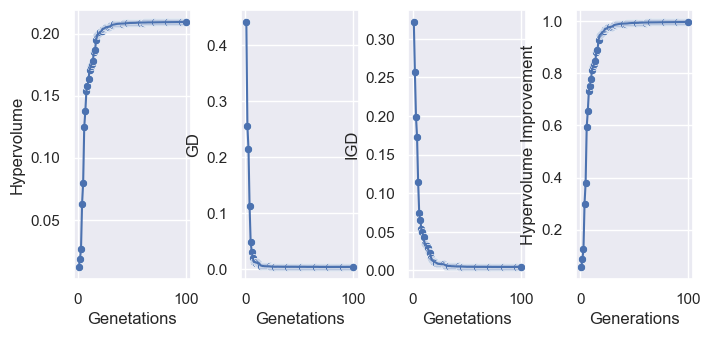

Max values of Hypervolume is 0.20932400900533135 
 , Best value of GD is 0.4410974668824819 
 , Best value of IGD is 
 0.3217136408323485 Best value of GD+ is 0.4410974668824819 , Best value of IGD+ is 0.3192903011451177


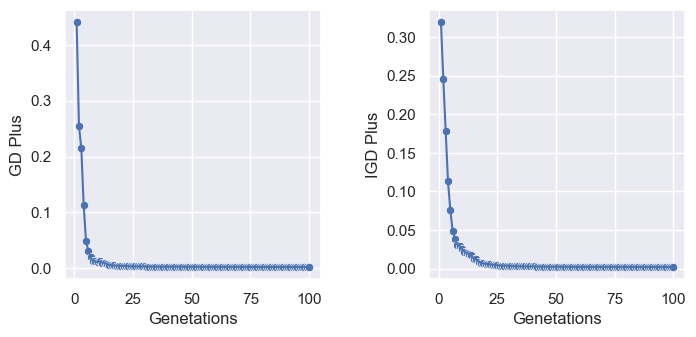

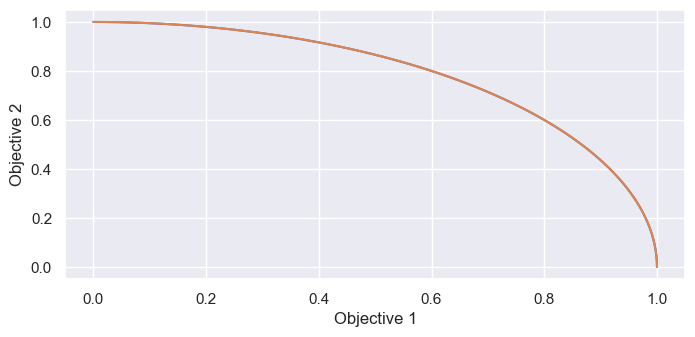

In [ ]:
from pymoo.algorithms.moo.moead import MOEAD
from pymoo.problems.many import DTLZ2
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.optimize import minimize
model_list_moead = []
problem = DTLZ2(n_obj=2,n_var=10)
ref_dirs = get_reference_directions('energy',2,100,seed=1)
algorithm = MOEAD(ref_dirs=ref_dirs , n_neighbours=15)
for i in range(5):
    model_list_moead.append(minimize(problem,
               algorithm,
               ('n_gen', 100),
               seed=2,
               save_history = True,
               verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list_moead:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar10 for i in data_avg_hyp_improvement ]




import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,4)
sns.set_theme(style="darkgrid")
fig.suptitle('Performance Plot with n_var=10')
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
axes[2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[3])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[3])
axes[3].set(xlabel='Generations',ylabel='Hypervolume Improvement')



plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,2)

sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)

fig.suptitle('Performance Plot with n_var=10')
sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='IGD Plus')
plt.show()


problem = DTLZ2(n_obj=2)
original_pareto_front = problem.pareto_front()
original_objective_1 = [i[0] for i in original_pareto_front]
original_objective_2 = [i[1] for i in original_pareto_front]
optimized_result = model_list_moead[0]
optimized_objectives  = optimized_result.F
optimized_objective_1 = [i[0] for i in optimized_objectives]
optimized_objective_2 = [i[1] for i in optimized_objectives]
sns.lineplot(x=original_objective_1,y=original_objective_2)
sns.lineplot(x=optimized_objective_1,y=optimized_objective_2)
plt.xlabel("Objective 1")
plt.ylabel("Objective 2")
plt.show()

#### NSGA3 nobj = 2 nvars = 2

In [ ]:
from pymoo.algorithms.moo.nsga3 import NSGA3
from pymoo.problems.many import DTLZ2
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.optimize import minimize
model_list_nsga3 = []
problem = DTLZ2(n_obj=2,n_var=2)
ref_dirs = get_reference_directions('energy',2,100,seed=1)
algorithm = NSGA3(ref_dirs=ref_dirs)
for i in range(5):
    model_list_nsga3.append(minimize(problem,
               algorithm,
               ('n_gen', 100),
               seed=1,
               save_history = True,
               verbose=True))

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |       90 |     13 |  0.0489279390 |  0.0150761508 |  0.1692119179 |  0.0148207099 |  0.0295043855
     2 |      180 |     26 |  0.0235765264 |  0.0149888490 |  0.1863076833 |  0.0146258007 |  0.0135842069
     3 |      270 |     25 |  0.0287897209 |  0.0146185931 |  0.1833012082 |  0.0137590608 |  0.0138377857
     4 |      360 |     44 |  0.0138245175 |  0.0101414300 |  0.1998534968 |  0.0091077994 |  0.0071464637
     5 |      450 |     57 |  0.0097870509 |  0.0079977690 |  0.2029180439 |  0.0068349585 |  0.0054557612
     6 |      540 |     65 |  0.0087545559 |  0.0078893152 |  0.2055694812 |  0.0061312559 |  0.0045013619
     7 |      630 |     73 |  0.0076667331 |  0.0074477536 |  0.2067055802 |  0.0058370273 |  0.0039843829
     8 |      720 |     75 |  0.0069849192 |  0.0070916072 |  0.2073184079 |  0.0055729567 |  0.0035984573
     9 |      810 |     76 |  0.00646

In [ ]:
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list_nsga3:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar2 for i in data_avg_hyp_improvement ]


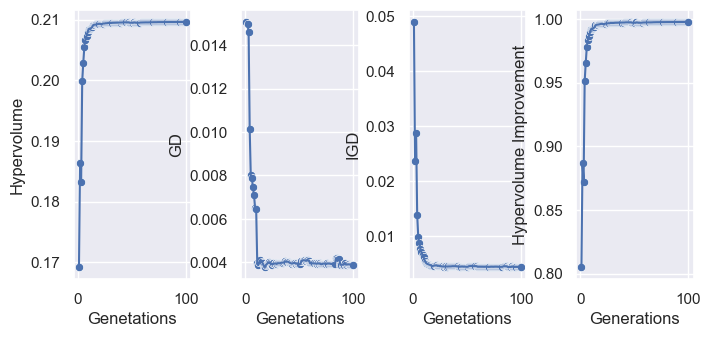

Max values of Hypervolume is 0.20962542873652962 
 , Best value of GD is 0.01507615076856952 
 , Best value of IGD is 
 0.048927938993769876 Best value of GD+ is 0.014820709851274158 , Best value of IGD+ is 0.029504385521671485


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,4)
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
fig.suptitle('Performance Plot with n_var=2')
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
axes[2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[3])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[3])
axes[3].set(xlabel='Generations',ylabel='Hypervolume Improvement')


plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))

[Text(0.5, 0, 'Genetations'), Text(0, 0.5, 'IGD Plus')]

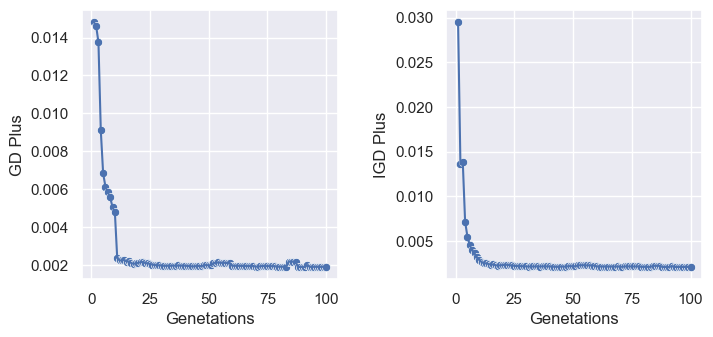

In [ ]:
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,2)

sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)
fig.suptitle('Performance Plot with n_var=2')
sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='IGD Plus')



Text(0, 0.5, 'Objective 2')

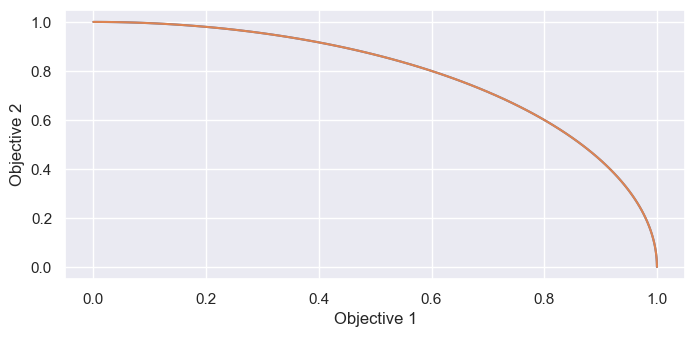

In [ ]:
problem = DTLZ2(n_obj=2)
original_pareto_front = problem.pareto_front()
original_objective_1 = [i[0] for i in original_pareto_front]
original_objective_2 = [i[1] for i in original_pareto_front]
optimized_result = model_list_nsga3[0]
optimized_objectives  = optimized_result.F
optimized_objective_1 = [i[0] for i in optimized_objectives]
optimized_objective_2 = [i[1] for i in optimized_objectives]
sns.lineplot(x=original_objective_1,y=original_objective_2)
sns.lineplot(x=optimized_objective_1,y=optimized_objective_2)
plt.xlabel("Objective 1")
plt.ylabel("Objective 2")

#### NSGA3 nobj = 2 , nvars  = 3

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |       90 |     10 |  0.0944295038 |  0.0409365827 |  0.0921185921 |  0.0409231889 |  0.0620376722
     2 |      180 |     14 |  0.0559284904 |  0.0597970680 |  0.1475398558 |  0.0597825555 |  0.0421082810
     3 |      270 |     16 |  0.0574328782 |  0.0514575631 |  0.1638792122 |  0.0513979896 |  0.0502613390
     4 |      360 |     19 |  0.0485495574 |  0.0349275613 |  0.1649193280 |  0.0348173142 |  0.0249000763
     5 |      450 |     21 |  0.0427520105 |  0.0285006229 |  0.1739533390 |  0.0283322129 |  0.0333522235
     6 |      540 |     31 |  0.0326754908 |  0.0218746710 |  0.1868075547 |  0.0215688387 |  0.0284018626
     7 |      630 |     36 |  0.0195465943 |  0.0105635515 |  0.1918228104 |  0.0101070058 |  0.0129451449
     8 |      720 |     51 |  0.0145117109 |  0.0094008941 |  0.1985435398 |  0.0086197048 |  0.0099764909
     9 |      810 |     60 |  0.01258

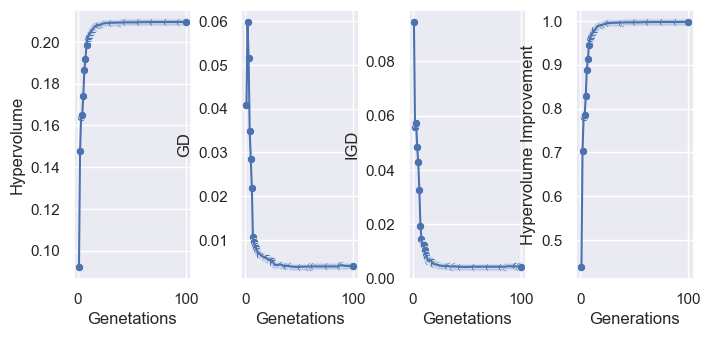

Max values of Hypervolume is 0.20961118857621722 
 , Best value of GD is 0.05979706797010107 
 , Best value of IGD is 
 0.0944295038048069 Best value of GD+ is 0.059782555511002075 , Best value of IGD+ is 0.06203767221008334


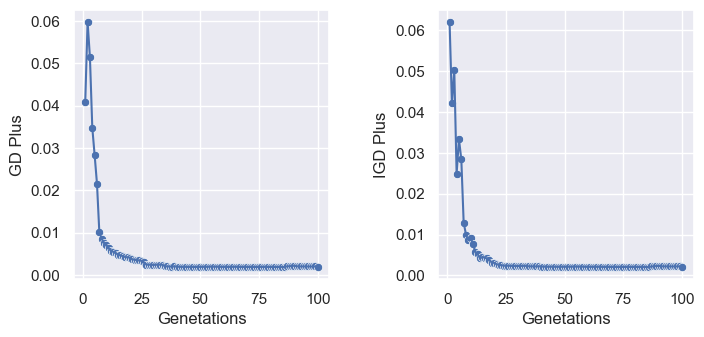

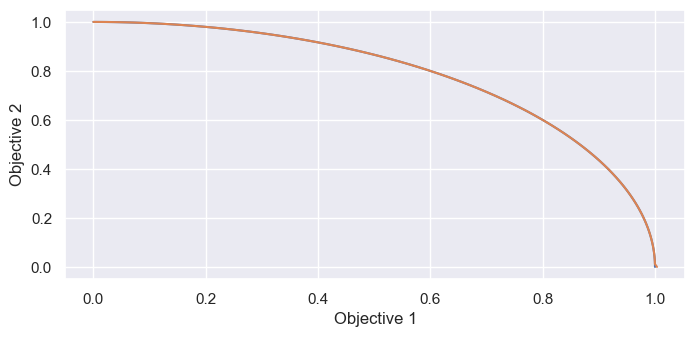

In [ ]:
from pymoo.algorithms.moo.nsga3 import NSGA3
from pymoo.problems.many import DTLZ2
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.optimize import minimize
model_list_nsga3 = []
problem = DTLZ2(n_obj=2,n_var=3)
ref_dirs = get_reference_directions('energy',2,100,seed=1)
algorithm = NSGA3(ref_dirs=ref_dirs)
for i in range(5):
    model_list_nsga3.append(minimize(problem,
               algorithm,
               ('n_gen', 100),
               seed=1,
               save_history = True,
               verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list_nsga3:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar3 for i in data_avg_hyp_improvement ]

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,4)
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
fig.suptitle('Performance Plot with n_var=3')
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
axes[2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[3])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[3])
axes[3].set(xlabel='Generations',ylabel='Hypervolume Improvement')

plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,2)

sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)
fig.suptitle('Performance Plot with n_var=3')
sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='GD Plus')
sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='IGD Plus')
plt.show()


problem = DTLZ2(n_obj=2)
original_pareto_front = problem.pareto_front()
original_objective_1 = [i[0] for i in original_pareto_front]
original_objective_2 = [i[1] for i in original_pareto_front]
optimized_result = model_list_nsga3[0]
optimized_objectives  = optimized_result.F
optimized_objective_1 = [i[0] for i in optimized_objectives]
optimized_objective_2 = [i[1] for i in optimized_objectives]
sns.lineplot(x=original_objective_1,y=original_objective_2)
sns.lineplot(x=optimized_objective_1,y=optimized_objective_2)
plt.xlabel("Objective 1")
plt.ylabel("Objective 2")
plt.show()

#### NSGA3 nobj = 2 , nvars = 5

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |       90 |      8 |  0.1831032777 |  0.1909559497 |  0.0477126107 |  0.1909559497 |  0.1607881105
     2 |      180 |      9 |  0.1454397102 |  0.1726652477 |  0.0704189493 |  0.1726652477 |  0.1374941565
     3 |      270 |     15 |  0.1128290653 |  0.1509890260 |  0.0685340103 |  0.1509887464 |  0.1073818635
     4 |      360 |     10 |  0.1512136538 |  0.1152936162 |  0.1178536017 |  0.1152936162 |  0.1414018603
     5 |      450 |     12 |  0.0961542108 |  0.0764935498 |  0.1108985325 |  0.0764935498 |  0.0765392136
     6 |      540 |     16 |  0.1161381557 |  0.0679023516 |  0.1262556425 |  0.0679013533 |  0.1064623355
     7 |      630 |     18 |  0.0695385163 |  0.0526363152 |  0.1458212595 |  0.0525953165 |  0.0518000227
     8 |      720 |     18 |  0.0599330117 |  0.0428362964 |  0.1534947177 |  0.0427932240 |  0.0369699671
     9 |      810 |     19 |  0.07408

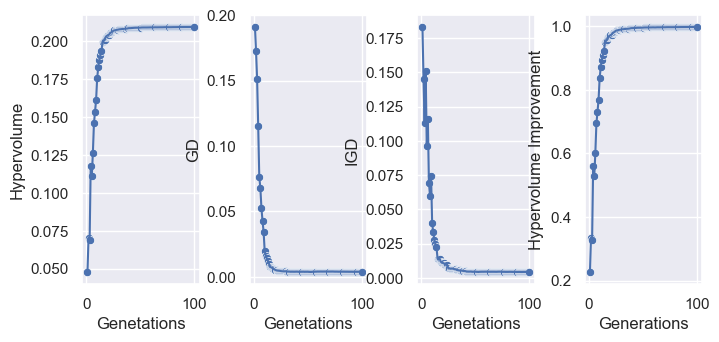

Max values of Hypervolume is 0.209566089843969 
 , Best value of GD is 0.19095594973573976 
 , Best value of IGD is 
 0.18310327765542733 Best value of GD+ is 0.19095594973573976 , Best value of IGD+ is 0.16078811054865805


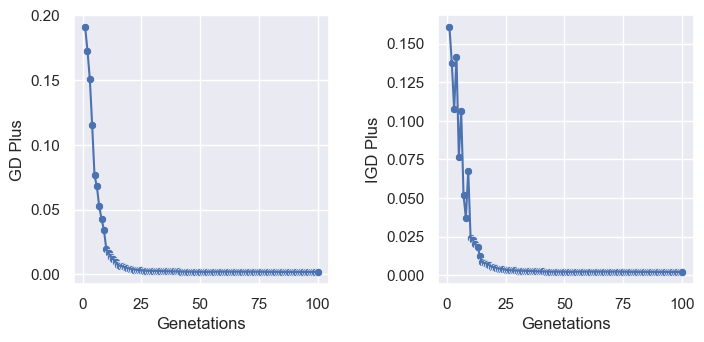

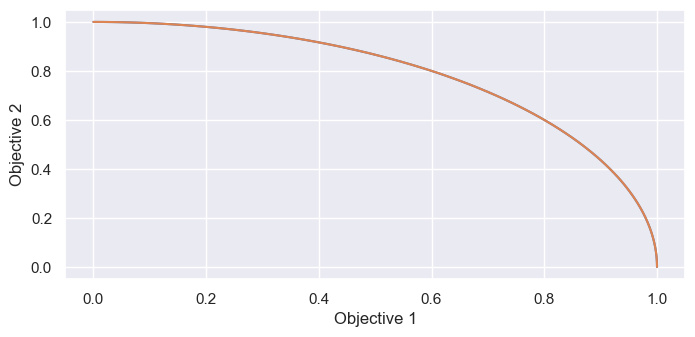

In [ ]:
from pymoo.algorithms.moo.nsga3 import NSGA3
from pymoo.problems.many import DTLZ2
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.optimize import minimize
model_list_nsga3 = []
problem = DTLZ2(n_obj=2,n_var=5)
ref_dirs = get_reference_directions('energy',2,100,seed=1)
algorithm = NSGA3(ref_dirs=ref_dirs)
for i in range(5):
    model_list_nsga3.append(minimize(problem,
               algorithm,
               ('n_gen', 100),
               seed=1,
               save_history = True,
               verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list_nsga3:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar5 for i in data_avg_hyp_improvement ]


import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,4)
sns.set_theme(style="darkgrid")
fig.suptitle('Performance Plot with n_var=5')
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
axes[2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[3])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[3])
axes[3].set(xlabel='Generations',ylabel='Hypervolume Improvement')


plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,2)

sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)
fig.suptitle('Performance Plot with n_var=5')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='GD Plus')
sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='IGD Plus')
plt.show()

problem = DTLZ2(n_obj=2)
original_pareto_front = problem.pareto_front()
original_objective_1 = [i[0] for i in original_pareto_front]
original_objective_2 = [i[1] for i in original_pareto_front]
optimized_result = model_list_nsga3[0]
optimized_objectives  = optimized_result.F
optimized_objective_1 = [i[0] for i in optimized_objectives]
optimized_objective_2 = [i[1] for i in optimized_objectives]
sns.lineplot(x=original_objective_1,y=original_objective_2)
sns.lineplot(x=optimized_objective_1,y=optimized_objective_2)
plt.xlabel("Objective 1")
plt.ylabel("Objective 2")
plt.show()

#### NSGA3 nobj = 2 nvars = 10

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |       90 |      8 |  0.4924812169 |  0.5544717648 |  0.000000E+00 |  0.5544717648 |  0.4821369000
     2 |      180 |     10 |  0.4116273654 |  0.5382019772 |  0.000000E+00 |  0.5382019772 |  0.4106722467
     3 |      270 |      8 |  0.3062636042 |  0.3855576500 |  0.000000E+00 |  0.3855576500 |  0.2618719536
     4 |      360 |      7 |  0.3727475262 |  0.3500768589 |  0.000000E+00 |  0.3500768589 |  0.3286222231
     5 |      450 |      7 |  0.3193277569 |  0.3096709790 |  0.0023659151 |  0.3096709790 |  0.3057391916
     6 |      540 |      9 |  0.1974267514 |  0.2498115916 |  0.0228768938 |  0.2498115916 |  0.1784018044
     7 |      630 |      9 |  0.2501267254 |  0.2254557392 |  0.0539660820 |  0.2254557392 |  0.2313508824
     8 |      720 |      6 |  0.1799557576 |  0.2087822435 |  0.0588036182 |  0.2087822435 |  0.1686709576
     9 |      810 |      9 |  0.15734

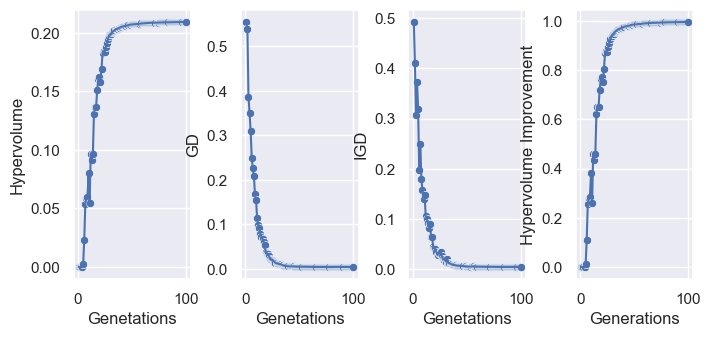

Max values of Hypervolume is 0.20919493094206015 
 , Best value of GD is 0.5544717648137236 
 , Best value of IGD is 
 0.4924812168512158 Best value of GD+ is 0.5544717648137236 , Best value of IGD+ is 0.48213690002003384


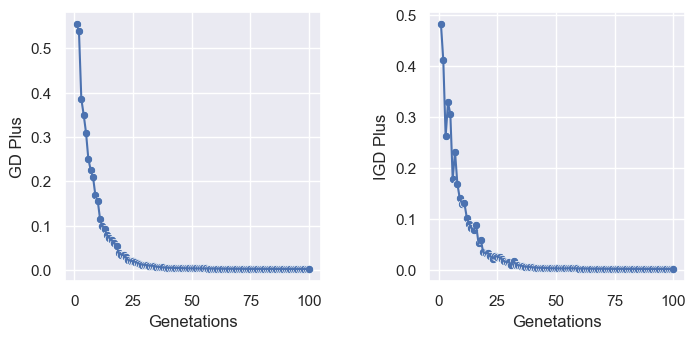

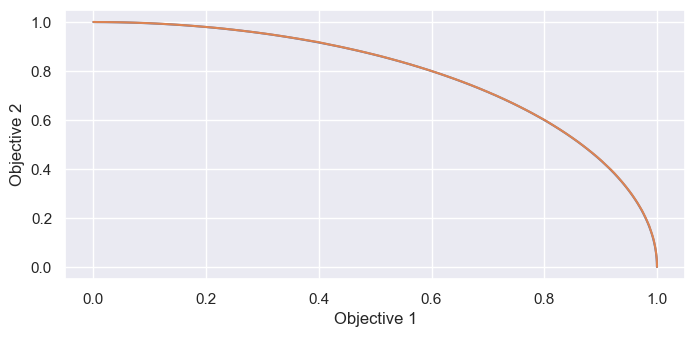

In [ ]:
from pymoo.algorithms.moo.nsga3 import NSGA3
from pymoo.problems.many import DTLZ2
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.optimize import minimize
model_list_nsga3 = []
problem = DTLZ2(n_obj=2,n_var=10)
ref_dirs = get_reference_directions('energy',2,100,seed=1)
algorithm = NSGA3(ref_dirs=ref_dirs)
for i in range(5):
    model_list_nsga3.append(minimize(problem,
               algorithm,
               ('n_gen', 100),
               seed=1,
               save_history = True,
               verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list_nsga3:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar10 for i in data_avg_hyp_improvement ]


import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,4)
sns.set_theme(style="darkgrid")
fig.suptitle('Performance Plot with n_var=10')
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
axes[2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[3])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[3])
axes[3].set(xlabel='Generations',ylabel='Hypervolume Improvement')

plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,2)

sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)

fig.suptitle('Performance Plot with n_var=10')
sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='GD Plus')
sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='IGD Plus')
plt.show()


problem = DTLZ2(n_obj=2)
original_pareto_front = problem.pareto_front()
original_objective_1 = [i[0] for i in original_pareto_front]
original_objective_2 = [i[1] for i in original_pareto_front]
optimized_result = model_list_nsga3[0]
optimized_objectives  = optimized_result.F
optimized_objective_1 = [i[0] for i in optimized_objectives]
optimized_objective_2 = [i[1] for i in optimized_objectives]
sns.lineplot(x=original_objective_1,y=original_objective_2)
sns.lineplot(x=optimized_objective_1,y=optimized_objective_2)
plt.xlabel("Objective 1")
plt.ylabel("Objective 2")
plt.show()